### Problem Part B: Cyborg (Nice little mainframe twist)

Slade has put Cyborg in the ‘wrong floor’, and Cyborg is a smart CS / DS / engineering guy. However, Cyborg isn’t good with directions finding. Luckily, he does have some mainframe knowledge about dataset allocations. 

Slade has allocated the following datasets: Consider the dataset bit as a point in the K-Means clustering algorithm:

	SLADE.TRICK.EAST = 20 bits 
	SLADE.TRICK.WEST= 40 bits 
	SLADE.TRICK.NORTH = 10 bits 
	SLADE.TRICK.SOUTH = 30 bits 

Given now four directions (North, East, West, South), use the K-Means algorithm to help Cyborg escape the Maze of Doom, where he will not be able to stay awake (Slade has put some sort of sleeping agent in the maze) unless he is 2 times the recommended distance from the starting point. 

In [26]:
# Coding solution, similar to problem part 1 except this time we are calculating all distances available 
# that is at least 2 times the recommended distance from starting point. 

# We have to calculate the recommended distance by calculating the average Hamming distance first. 

# Import PCA and matplotlib. 

import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
import pandas as pd

# import k-means 
from sklearn.cluster import KMeans

In [27]:
# Slade's maze, as a 4 x 1 array. 

slade = [[20],[40],[10],[30]]
# Convert it into a single array. 
slade = [element for sublist in slade for element in sublist]
# Convert to an np array here. 

slade_np = np.array(slade)
print(slade_np)

[20 40 10 30]


In [28]:
# Make new slade array.

array_copy = [[20,40],[10,30]]

pca = PCA(n_components=2)
pca.fit(array_copy)

PCA(n_components=2)

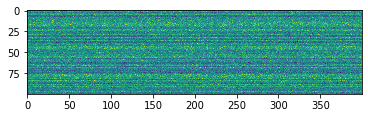

In [29]:
# Second PCA, given data 
# User input, this time with four main features. 
features = ['east','west','north','south']
n_samples  = 100
n_features = sum(slade_np) * len(features)

# Prep
truth = np.empty(n_samples)
data  = np.empty((n_samples, n_features))
np.random.seed(42)

# Generate
for i,mu in enumerate(np.random.choice([0,1,2,3], n_samples, replace=True)):
    truth[i]  = mu
    data[i,:] = np.random.normal(loc=mu, scale=1.5, size=n_features)

# Show
plt.imshow(data, interpolation='none')
plt.show()

#### Note, since we calculating distance here, there is no need to make a cluster plot. 

In [30]:
# Apply K-Means here. However, unlike problem 1, we are to find the average of all distances, and 
# then only list the distance that is 2x the distance of the average. 

pca2 = PCA(n_components=2).fit(data)
data2D = pca2.transform(data)
print(data2D)

# Kmeans
km = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=3, random_state=0)
km.fit(data2D)
print(km)

[[-8.79157376e+00 -5.48964336e+00]
 [-2.65784015e+01  2.70996610e+00]
 [ 2.85503714e+01 -5.25721412e-01]
 [-8.40947260e+00 -3.70129200e+00]
 [-8.44455259e+00  8.15931222e+00]
 [-2.71555658e+01  2.01369064e+00]
 [ 3.08657556e+01  2.59553839e-01]
 [ 3.58575459e+01 -1.73019748e+00]
 [-8.85072972e+00  3.07757982e+00]
 [ 1.50031325e+01  3.84337167e+00]
 [-4.66552163e+00 -4.23699175e+00]
 [-6.75752460e+00  4.51154145e+00]
 [-8.64591509e+00  4.73507744e+00]
 [-5.37737842e+00 -4.66954996e+00]
 [-2.48195188e+01 -7.35015130e-01]
 [ 3.27454608e+01  1.48370300e+00]
 [-2.52434877e+01 -1.22312392e+00]
 [-2.76367338e+01 -9.05962119e+00]
 [-2.64599230e+01  2.47909021e+00]
 [-9.43750760e+00  4.66449349e+00]
 [ 1.31544447e+01  1.76586942e+00]
 [ 3.12050456e+01 -4.91857518e+00]
 [ 1.32256858e+01 -6.03625637e-01]
 [-2.73785234e+01 -1.38312922e-01]
 [-2.69433005e+01 -1.57802406e+00]
 [ 1.32254013e+01  4.39080282e+00]
 [ 1.46948379e+01  3.58794247e+00]
 [ 1.37662163e+01  4.74037065e+00]
 [-2.83718998e+01  1

In [31]:
# Calculate all of the distances here, using the same function as problem 1, but with a slight twist. 

# We then determine the closest values from the K-Means to solve the problem. 
# Source: https://stackoverflow.com/questions/54240144/distance-between-nodes-and-the-centroid-in-a-kmeans-cluster
# Apply k-means transform to get the approximate best value for least number of bars Robin can eat to avoid 
# getting sick. 

def determine_closest_values_2():
    distances = km.transform(data2D)**2 # Hamming distance calculate 
    distances_dataframe = pd.DataFrame(distances.sum(axis=1).round(2), columns=['best value'])
    # distances_dataframe['label'] = y
    # Reduce the output to 10 to reduce the clustering centroid factor.
    print(distances_dataframe.head(1000))
    print(type(distances_dataframe.head()))
    
    # print sorted. 
    print("Sorted best values for Robin to avoid getting sick eating 'bad' ice cream bars: \n")
    print(sorted(np.array(distances_dataframe.head(1000))))
    
    sorted_np = sorted(np.array(distances_dataframe.head(1000)))
    
    # calculate the average. 
    list_escapes = []
    avg = sum(sorted_np) / len(sorted_np)
    # recommended distance is the maximum - average. 
    print("Recommended distance: ")
    recommended = max(sorted_np) - avg
    print(recommended)
    
    for value in sorted(np.array(distances_dataframe.head(10))):
        if value > 2 * recommended: 
            list_escapes.append(value)
            
    print("The bit lengths that Cyborg must take to escape the Maze of Doom: ")
    return list_escapes
    
determine_closest_values_2()

    best value
0      2676.20
1      5500.80
2      4672.79
3      2575.85
4      2792.09
..         ...
95     2656.53
96     2229.74
97     6052.13
98     2511.59
99     4592.92

[100 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
Sorted best values for Robin to avoid getting sick eating 'bad' ice cream bars: 

[array([2229.74]), array([2287.81]), array([2306.56]), array([2308.6]), array([2313.17]), array([2328.19]), array([2373.05]), array([2396.6]), array([2402.5]), array([2403.82]), array([2412.96]), array([2419.93]), array([2429.74]), array([2434.27]), array([2448.33]), array([2453.11]), array([2455.38]), array([2456.27]), array([2460.79]), array([2466.37]), array([2473.24]), array([2495.12]), array([2500.9]), array([2507.17]), array([2511.59]), array([2511.8]), array([2531.69]), array([2533.04]), array([2543.68]), array([2548.73]), array([2562.99]), array([2567.58]), array([2568.43]), array([2575.85]), array([2580.41]), array([2590.79]), array([2600.19]), array([2633.29

[array([5170.51]), array([5500.8]), array([5624.52]), array([6402.48])]

So, Cyborg must take 5170.51 total bits length in terms of distance at least to escape the Maze of Doom.